## Objective:

### To simulate, understand, and compare different regression techniques — OLS, Ridge, and Lasso — using synthetic data, with a focus on model performance, feature selection, and interpretation
# -----------------------------------------------------------------
#

## Assumptions of Linear Regression (OLS):

1. Linearity  
2. Independence of errors  
3. Homoscedasticity (constant variance of errors)  
4. Normality of Errors  
5. No multicollinearity  
6. No autocorrelation (for time series)

#

### This code below demonstrates a simple linear regression in one dimension using the Least Squares method to estimate the slope of a linear model ``y = βx + ε``, where ε is normally distributed noise.

#


### What’s Happening Here?
We generated 10 data points. The true relationship is:

``y = βx + ε``  
where:
- β = 1.2 (true slope)
- ε = random noise from a normal distribution (mean = 0, std = 1)

The scatter plot shows the noisy observations.

Manual estimation of slope (β̂) using the OLS formula 


Estimated beta (beta_hat): 1.227816291155777


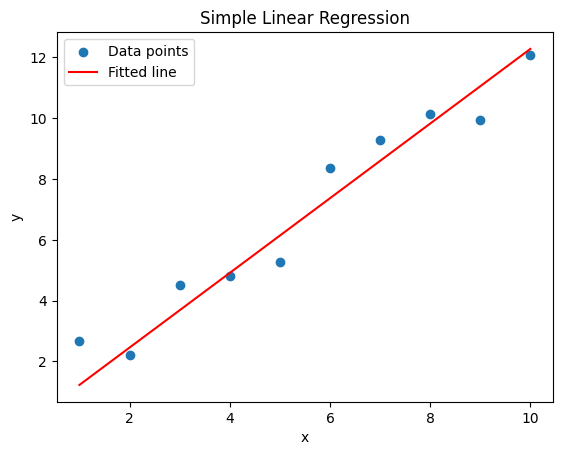

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 11)  # [1, 2, ..., 10]

epsilon = np.random.normal(0, 1, size=10)

# True coefficient
beta = 1.2

# Dependent variable with noise
y = beta * x + epsilon

# Plot the data
plt.scatter(x, y, label='Data points')

# Least Squares Estimator:
beta_hat = np.sum(x * y) / np.sum(x * x)
print(f"Estimated beta (beta_hat): {beta_hat}")

# Plot the regression line
plt.plot(x, beta_hat * x, color='red', label='Fitted line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.show()


### Summary:
##### Main goal: Perform simple linear regression manually by computing the slope (β̂) using least squares.

In [ ]:
#### --------------------------------------------------------------------------------------------------------##

### Performs simple linear regression on synthetic data where:

- The feature ``x`` is drawn from a uniform distribution between 0 and 1.

- The noise ``epsilon`` is normally distributed with mean 0 and standard deviation sigma = 1.

- It estimates the slope (``beta_hat``) using least squares.

Estimated beta (beta_hat): 1.2795


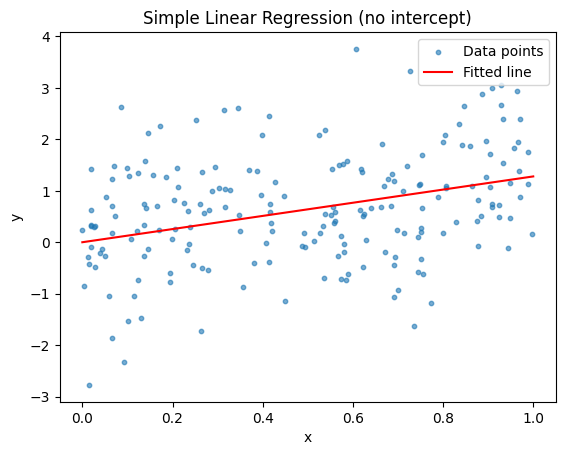

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

n = 200
sigma = 1

# Uniformly distributed feature values between 0 and 1
x = np.random.uniform(0, 1, n)

# True slope
beta = 1.2

# Normally distributed noise
epsilon = np.random.normal(0, sigma, n)

# Linear model with noise
y = x * beta + epsilon

# Plot the data
plt.scatter(x, y, s=10, alpha=0.6, label='Data points')

# Least squares estimate (slope only, no intercept)
beta_hat = np.sum(x * y) / np.sum(x * x)
print(f"Estimated beta (beta_hat): {beta_hat:.4f}")

# Plot the regression line from x=0 to x=1
x_line = np.array([0, 1])
y_line = beta_hat * x_line
plt.plot(x_line, y_line, color='red', label='Fitted line')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Linear Regression (no intercept)")
plt.legend()
plt.show()


In [ ]:
## ------------------------------------------------------------------------------------------------------------##

#### This code:

creates a nonlinear regression model using polynomial features of a single variable x1.It shows how adding x1² and x1³ (pseudo-features) creates a more flexible model

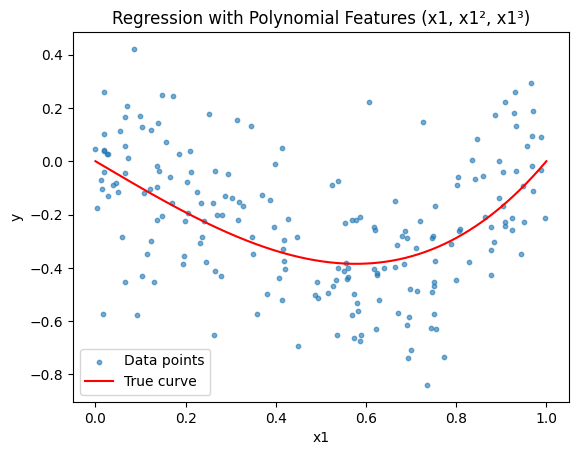

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

n = 200
sigma = 0.2

# Feature and polynomial transformations
x1 = np.random.uniform(0, 1, n)
x2 = x1 ** 2
x3 = x1 ** 3

# Coefficients
beta = np.array([-1, 0, 1])

# Noise
epsilon = np.random.normal(0, sigma, n)

# Target variable
y = x1 * beta[0] + x2 * beta[1] + x3 * beta[2] + epsilon

# Plotting data
plt.scatter(x1, y, s=10, alpha=0.6, label='Data points')

# Plot true curve
xplot = np.linspace(0, 1, 1000)
yplot = xplot * beta[0] + xplot**2 * beta[1] + xplot**3 * beta[2]
plt.plot(xplot, yplot, color='red', label='True curve')

plt.xlabel("x1")
plt.ylabel("y")
plt.title("Regression with Polynomial Features (x1, x1², x1³)")
plt.legend()
plt.show()


#### Summary:
- This example uses 3 features: ``x1`` , ``x1^2`` , ``x1^3``
​
- Only ``x1`` and ``x1^3`` affect the output (since ``𝛽2``=0).

- Shows how polynomial regression works by simulating a nonlinear relationship
- we are not estimating ``β``. We generate synthetic data using known ``β`` values and just plot the true curve.

In [ ]:
##----------------------------------------------------------------------------------------------------------------------##

### This code:

Generates synthetic data using a polynomial model with 3 features: ``x1 , x1^2 , x1^3``

Estimates the coefficients ``β`` manually using the least squares formula

Compares the true model curve and the estimated model curve visually.

Estimated beta_hat: [-0.32985149 -2.20275681  2.66360468]


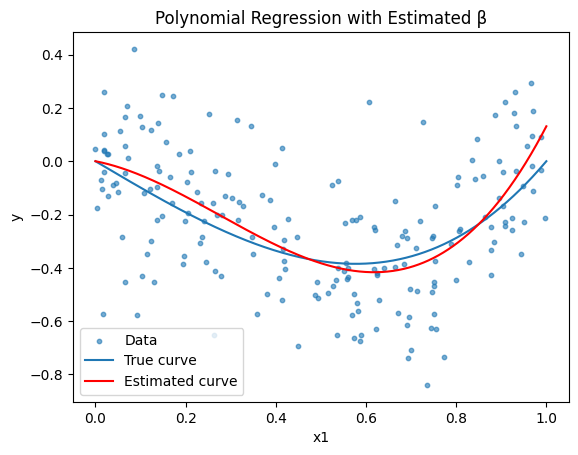

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

n = 200
sigma = 0.2

# Generate features
x1 = np.random.uniform(0, 1, n)
x2 = x1 ** 2
x3 = x1 ** 3

# Design matrix (n x 3)
X = np.column_stack((x1, x2, x3))

# True beta values
beta = np.array([-1, 0, 1])

# Noise
epsilon = np.random.normal(0, sigma, n)

# Output variable
y = X @ beta + epsilon

# Scatter plot
plt.scatter(x1, y, s=10, alpha=0.6, label='Data')

# True curve
xplot = np.linspace(0, 1, 1000)
y_true = xplot * beta[0] + xplot**2 * beta[1] + xplot**3 * beta[2]
plt.plot(xplot, y_true, label='True curve')

# Estimate beta_hat using least squares
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print("Estimated beta_hat:", beta_hat)

# Estimated curve
y_pred = xplot * beta_hat[0] + xplot**2 * beta_hat[1] + xplot**3 * beta_hat[2]
plt.plot(xplot, y_pred, color='red', label='Estimated curve')

plt.xlabel("x1")
plt.ylabel("y")
plt.title("Polynomial Regression with Estimated β")
plt.legend()
plt.show()


#### Summary (Short and Simple):
This code builds a polynomial regression model with 3 features.

It uses matrix operations to compute the least squares estimate for ``β``.

Then, it compares the true vs estimated polynomial curve on a plot.

In [ ]:
##------------------------------------------------------------------------------------------------------------------##

#### This code: 

Performs linear regression with 10 independent features (columns).
The idea is to:

- Generate a design matrix 
𝑋
∈
𝑅
200
×
10
  with random values.

- Create a target variable y using a known β vector and random noise.

- Estimate the coefficients using the least squares formula.

In [ ]:
import numpy as np

np.random.seed(1)

n = 200     # Number of samples
d = 10      # Number of features
sigma = 0.2

# Create design matrix X with values from uniform[0,1]
X = np.random.uniform(0, 1, size=(n, d))

beta = np.array([-1, 0, 1] + [0] * (d - 3))

# Noise
epsilon = np.random.normal(0, sigma, n)

# Target variable
y = X @ beta + epsilon

# Least squares estimate
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print("True beta:\n", beta)
print("\nEstimated beta_hat:\n", beta_hat)


True beta:
 [-1  0  1  0  0  0  0  0  0  0]

Estimated beta_hat:
 [-1.06957589 -0.11248255  0.9446739  -0.01051468  0.02922673  0.04628597
 -0.03314638  0.07719273  0.09489205  0.00806309]


Output Summary:

- Only β₀ = -1 and β₂ = 1 are non-zero

- All other coefficients are truly 0
- Other coefficients (should be 0) have small values, due to:

  - Random noise

  - Finite sample size (n = 200)

  - No regularization (pure OLS)

### Using Sklearn library to solve above problem

In [ ]:
import numpy as np
from  sklearn.linear_model import LinearRegression 

np.random.seed(1)
n = 200
d = 10
sigma = 0.2

X = np.random.uniform(0,1,size=(n,d))
epsilon = np.random.normal(0,sigma,n)
B = np.array([-1,0,1] + [0]*(d-3))

Y = X @ B + epsilon

model = LinearRegression(fit_intercept=False)
model.fit(X,Y)

model.coef_

array([-1.06957589, -0.11248255,  0.9446739 , -0.01051468,  0.02922673,
        0.04628597, -0.03314638,  0.07719273,  0.09489205,  0.00806309])

## Ridge Regression

This script performs:

Ridge Regression on synthetic data with 10 features.

Calculates the ridge estimator (
𝛽
^
𝑟
𝑖
𝑑
𝑔
𝑒
).

Computes the risk (test error) and compares it to the Bayes risk.

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(1)

n = 200
d = 10
sigma = 0.2

# Training data
X = np.random.uniform(0, 1, size=(n, d))
beta = np.array([-1, 0, 1] + [0]*(d - 3))
epsilon = np.random.normal(0, sigma, n)
y = X @ beta + epsilon

# Ridge regression 
ridge_model = Ridge(alpha=0.01 * n, fit_intercept=False)
ridge_model.fit(X, y)
beta_hat_ridge = ridge_model.coef_
print("Estimated beta_hat (ridge):\n", beta_hat_ridge)

# Test data for risk estimation
ntest = 1000
X_test = np.random.uniform(0, 1, size=(ntest, d))
epsilon_test = np.random.normal(0, sigma, ntest)
y_test = X_test @ beta + epsilon_test

# Predict and compute risk
y_pred = X_test @ beta_hat_ridge
risk = mean_squared_error(y_test, y_pred)
bayes_risk = sigma ** 2
excess_bayes_risk = risk - bayes_risk

print("\nRisk:", risk)
print("Bayes Risk:", bayes_risk)
print("Excess Bayes Risk:", excess_bayes_risk)


Estimated beta_hat (ridge):
 [-0.93914539 -0.09202406  0.84038599 -0.01373269  0.0398698   0.03144467
 -0.02147439  0.06427992  0.08007757 -0.00968459]

Risk: 0.043840805778466524
Bayes Risk: 0.04000000000000001
Excess Bayes Risk: 0.003840805778466516


### Summary:
Ridge Coefficients:

True beta: [-1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

The estimates show "shrinkage" toward zero due to regularization:

- First coefficient: -0.939 (vs true -1)
- Third coefficient: 0.840 (vs true 1)
- Other coefficients: Small non-zero values, but closer to zero than OLS would provide




Risk Measures:

- Risk (MSE on test data): 0.0438
- Bayes Risk (theoretical minimum, σ²): 0.0400
- Excess Bayes Risk: 0.0038 

The Ridge regression is performing very well - the error is just slightly above the theoretical minimum. 

The L2 regularization has shrunk all coefficients toward zero, introducing some bias but likely reducing variance, resulting in good overall performance

In [ ]:
##------------------------------------------------------------------------------------------------------##

### This Code:

Performs Ridge Regression on synthetic data using different lambda values.

Tracks how each β coefficient changes as λ increases — called a Ridge profile or coefficient path.

Plots how coefficients shrink as regularization increases.

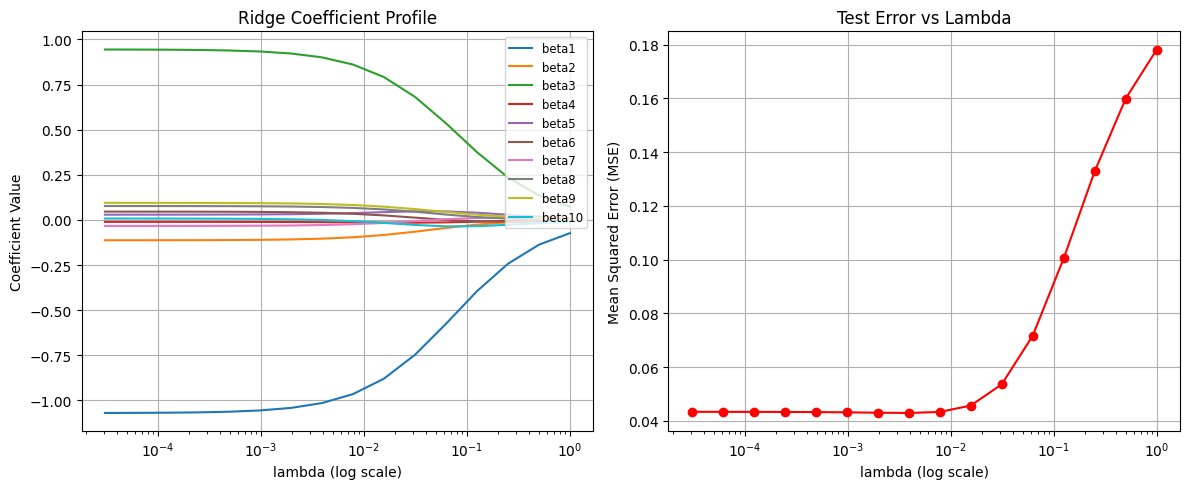

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(1)

n = 200
d = 10
sigma = 0.2

# Training data
X = np.random.uniform(0, 1, size=(n, d))
beta = np.array([-1, 0, 1] + [0] * (d - 3))
epsilon = np.random.normal(0, sigma, n)
y = X @ beta + epsilon

# Test data
ntest = 1000
X_test = np.random.uniform(0, 1, size=(ntest, d))
epsilon_test = np.random.normal(0, sigma, ntest)
y_test = X_test @ beta + epsilon_test

# Lambda (ridge regularization) values
lambdas = 0.5 ** np.arange(16)
alphas = lambdas * n

# Store coefficients and losses
beta_hat_ridge = np.zeros((d, len(alphas)))
mse_list = []

# Fit ridge model and store outputs
for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X, y)
    beta_hat_ridge[:, i] = model.coef_

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Plot 1: Coefficient profile
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for j in range(d):
    plt.plot(lambdas, beta_hat_ridge[j, :], label=f'beta{j+1}')
plt.xscale('log')
plt.xlabel('lambda (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficient Profile')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)

# Plot 2: MSE vs lambda
plt.subplot(1, 2, 2)
plt.plot(lambdas, mse_list, marker='o', color='red')
plt.xscale('log') ## This implements logarithmic scaling for x-axis
plt.xlabel('lambda (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test Error vs Lambda')
plt.grid(True)

plt.tight_layout()
plt.show()


### Insight:

- Low λ: less regularization, risk of overfitting.

- High λ: more regularization, risk of underfitting.

- You can choose the λ with the lowest MSE for best model performance.

### This Code:

Simulates synthetic data with 10 features.

- Uses ``RidgeCV`` to find the best lambda (regularization strength) using cross-validation.

- Fits Ridge Regression using the best lambda.

- Outputs the best lambda and the final model's coefficients

In [ ]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

np.random.seed(1)

n = 200
d = 10
sigma = 0.2

X = np.random.uniform(0, 1, size=(n, d))
beta = np.array([-1, 0, 1] + [0]*(d - 3))
epsilon = np.random.normal(0, sigma, n)
y = X @ beta + epsilon

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define lambdas (alphas) to try
lambdas = 0.5 ** np.arange(16)
alphas = lambdas * n  # sklearn RidgeCV expects "alpha", equivalent to lambda * n

# Cross-validated Ridge Regression
ridge_cv = RidgeCV(alphas=alphas, fit_intercept=False)
ridge_cv.fit(X_scaled, y)

# Get best lambda (converted back from alpha)
best_lambda = ridge_cv.alpha_ / n
print(f"✅ Best lambda (from CV): {best_lambda}")

# Coefficients from the best model
print("📊 Coefficients:\n", ridge_cv.coef_)


✅ Best lambda (from CV): 0.0078125
📊 Coefficients:
 [-0.31176461 -0.03799353  0.27045363 -0.00744179  0.00543046  0.00832837
 -0.01296015  0.01837381  0.02049634 -0.00220022]


### This code
Simulates synthetic data with 10 features.

Applies Lasso Regression using the glmnet package.

Lets the model choose the best lambda using cross-validation.

Fits the Lasso model again using the best lambda.

Outputs the final coefficients.

In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

np.random.seed(1)

n = 200
d = 10
sigma = 0.2

X = np.random.uniform(0, 1, size=(n, d))
beta = np.array([-1, 0, 1] + [0]*(d - 3))
epsilon = np.random.normal(0, sigma, n)
y = X @ beta + epsilon

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso with cross-validation
lasso_cv = LassoCV(cv=5, fit_intercept=False)
lasso_cv.fit(X_scaled, y)

# Best lambda and final coefficients
print(f"✅ Best lambda (alpha): {lasso_cv.alpha_}")
print("📊 Lasso coefficients:\n", lasso_cv.coef_)


✅ Best lambda (alpha): 0.01926919752905239
📊 Lasso coefficients:
 [-0.2911996  -0.02251395  0.24767726 -0.          0.          0.
 -0.          0.          0.         -0.        ]


In [ ]:
##----------------------------------------------------------------------------------------------## 

#### 1. OLS (Ordinary Least Squares)

Estimated Coefficients: All features retain non-zero weights.

- Behavior: No regularization, so it tries to fit the training data as best as possible.

- Problem: Can overfit, especially when irrelevant or noisy features are present.

- Observation: Coefficients are large and not sparse, meaning OLS is not selective.

#### 2. Ridge Regression

Estimated Coefficients: All features are used, but many coefficients are shrunk toward zero.

- Excess Bayes Risk: 0.00384 → low, meaning ridge performs very close to the theoretical best

- Behavior: Handles multicollinearity well, improves generalization by adding L2 penalty.

- Observation: Coefficients are more stable and less extreme compared to OLS.

#### 3. Lasso Regression

Estimated Coefficients: Most are exactly zero — only a few features retained.

- Behavior: Adds L1 penalty, which performs automatic feature selection.

- Outcome: Gives the sparsest model, ideal when you believe only a few features matter.

- Observation: The most interpretable model. Likely avoids overfitting best, if feature sparsity aligns with true signal.

#### Conclusion

OLS fits everything, but may overfit or become unstable with noise or multicollinearity.

Ridge keeps all features but shrinks them to reduce overfitting. Great when you suspect many features matter, just not equally.

Lasso aggressively shrinks and drops irrelevant features, giving the simplest, cleanest model.

### Polynomial Regression

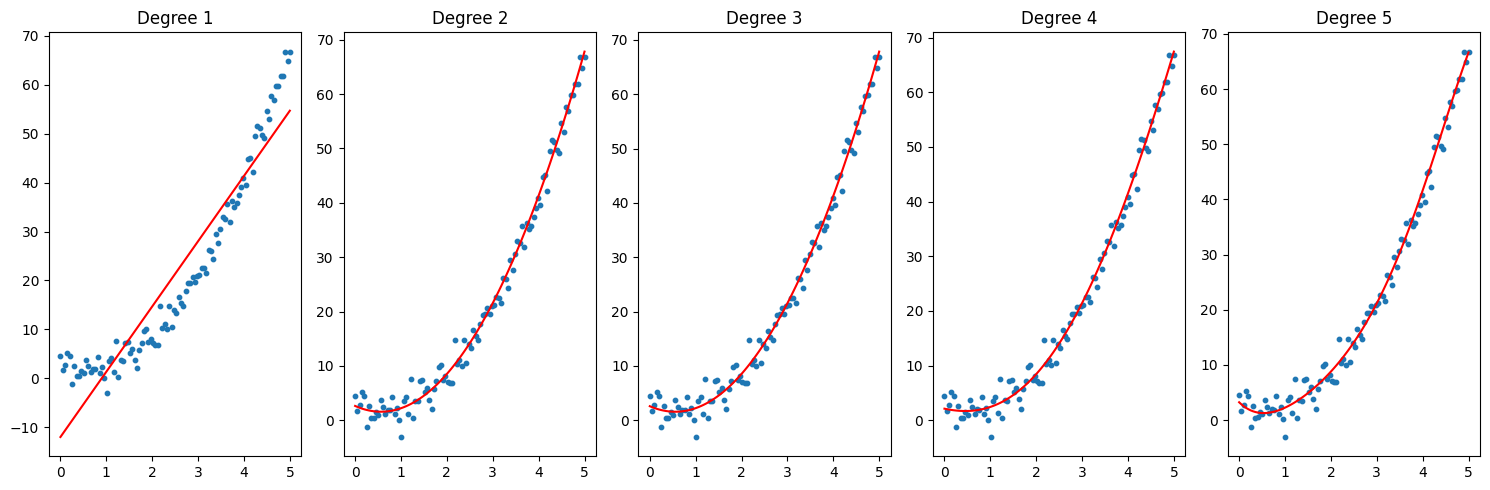

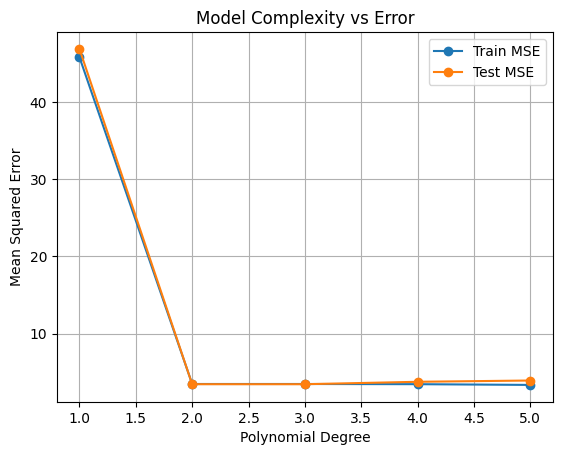

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Generate synthetic data (nonlinear)
np.random.seed(0)
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = 3 * X.squeeze()**2 - 2 * X.squeeze() + 1 + np.random.normal(0, 2, size=100)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Try multiple polynomial degrees
degrees = [1, 2, 3, 4, 5]
train_errors = []
test_errors = []

plt.figure(figsize=(15, 5))

for i, d in enumerate(degrees):
    # Transform features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict and calculate errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # Plot predictions
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    plt.subplot(1, len(degrees), i+1)
    plt.scatter(X, y, s=10, label="Data")
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {d}')
    plt.title(f'Degree {d}')
    plt.tight_layout()

plt.show()

# 3. Plot train vs test error
plt.plot(degrees, train_errors, label='Train MSE', marker='o')
plt.plot(degrees, test_errors, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs Error')
plt.legend()
plt.grid(True)
plt.show()


### What this code did:
Created synthetic data with a known quadratic pattern:

y=3x 
2
 −2x+1+noise
Tried polynomial regression with degrees 1 to 5

Plotted:

Fitted curves for each degree

Training and testing error (MSE) to evaluate model performance

#### How to choose the best degree?
Look at the second plot (error vs degree):

Degree with lowest test error is your best choice

Avoid degrees where test error increases (overfitting)